In [1]:
!which python

/Users/vrublevskyi/miniconda3/envs/env/bin/python


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pal = sns.color_palette()

In [4]:
%%capture
# use %%capture to hide cell output
# from https://huggingface.co/docs/datasets/v1.16.1/quickstart.html
from datasets import load_dataset
from transformers import AutoTokenizer


dataset = load_dataset('glue', 'mrpc', split='train')
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')

def encode(examples):
    return tokenizer(examples['sentence1'], examples['sentence2'], truncation=True, padding='max_length')

dataset = dataset.map(encode, batched=True)

The analysis below is inspired by this notebook https://www.kaggle.com/code/anokas/data-analysis-xgboost-starter-0-35460-lb

In [7]:
df_train = dataset.to_pandas()
df_train.head()

,sentence1,sentence2,label,idx,input_ids,token_type_ids,attention_mask
0,"Amrozi accused his brother , whom he called "" ...","Referring to him as only "" the witness "" , Amr...",1,0,"[101, 7277, 2180, 5303, 4806, 1117, 1711, 117,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,Yucaipa owned Dominick 's before selling the c...,Yucaipa bought Dominick 's in 1995 for $ 693 m...,0,1,"[101, 10684, 2599, 9717, 1161, 2205, 11288, 13...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
2,They had published an advertisement on the Int...,"On June 10 , the ship 's owners had published ...",1,2,"[101, 1220, 1125, 1502, 1126, 16355, 1113, 110...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
3,"Around 0335 GMT , Tab shares were up 19 cents ...","Tab shares jumped 20 cents , or 4.6 % , to set...",0,3,"[101, 5596, 5347, 19297, 14748, 1942, 117, 225...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
4,"The stock rose $ 2.11 , or about 11 percent , ...",PG & E Corp. shares jumped $ 1.63 or 8 percent...,1,4,"[101, 1109, 4482, 3152, 109, 123, 119, 1429, 1...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."


In [8]:
print('Total number of question pairs for training: {}'.format(len(df_train)))
print('Duplicate pairs: {}%'.format(round(df_train['label'].mean()*100, 2)))


Total number of question pairs for training: 3668
Duplicate pairs: 67.45%


mean-train 118.63 std-train 33.33 max-train 226.00


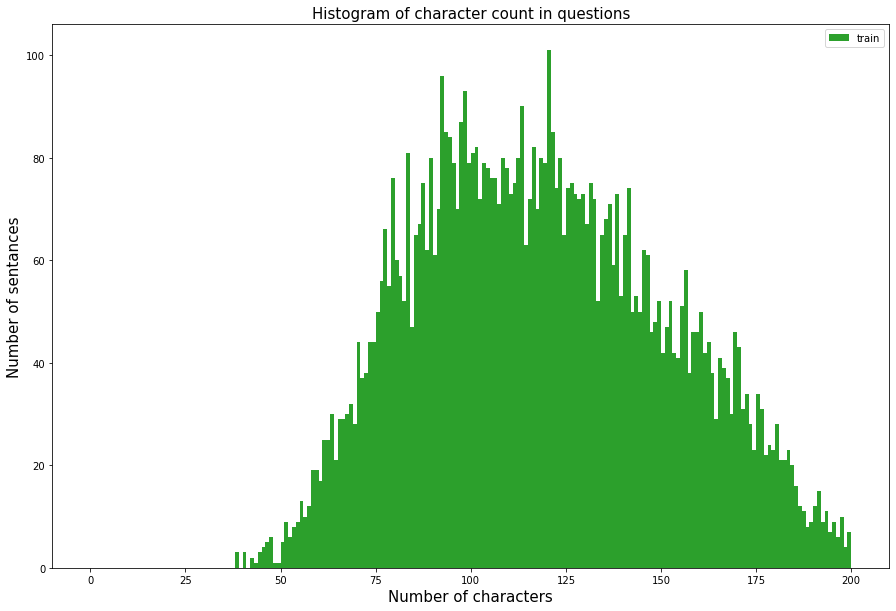

In [9]:
train_qs = pd.Series(df_train['sentence1'].tolist() + df_train['sentence2'].tolist()).astype(str)

dist_train = train_qs.apply(len)
plt.figure(figsize=(15, 10))
plt.hist(dist_train, bins=200, range=[0, 200], color=pal[2], label='train')
plt.title('Histogram of character count in questions', fontsize=15)
plt.legend()
plt.xlabel('Number of characters', fontsize=15)
plt.ylabel('Number of sentances', fontsize=15)

print('mean-train {:.2f} std-train {:.2f} max-train {:.2f}'.format(dist_train.mean(), dist_train.std(), dist_train.max()))

mean-train 21.94 std-train 5.65 max-train 42.00


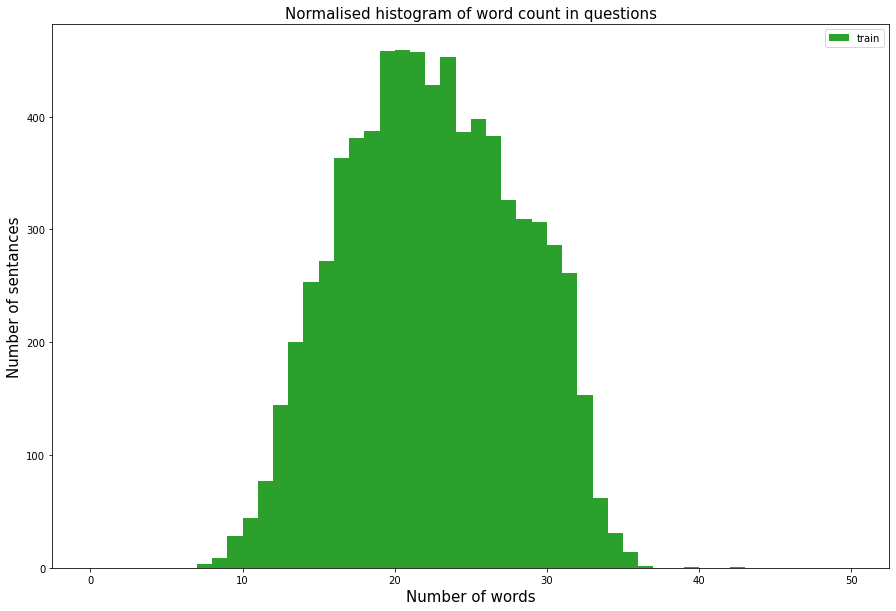

In [10]:
dist_train = train_qs.apply(lambda x: len(x.split(' ')))

plt.figure(figsize=(15, 10))
plt.hist(dist_train, bins=50, range=[0, 50], color=pal[2], label='train')
plt.title('Normalised histogram of word count in questions', fontsize=15)
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Number of sentances', fontsize=15)

print('mean-train {:.2f} std-train {:.2f} max-train {:.2f}'.format(dist_train.mean(), dist_train.std(),  dist_train.max()))

(-0.5, 1439.5, 1079.5, -0.5)

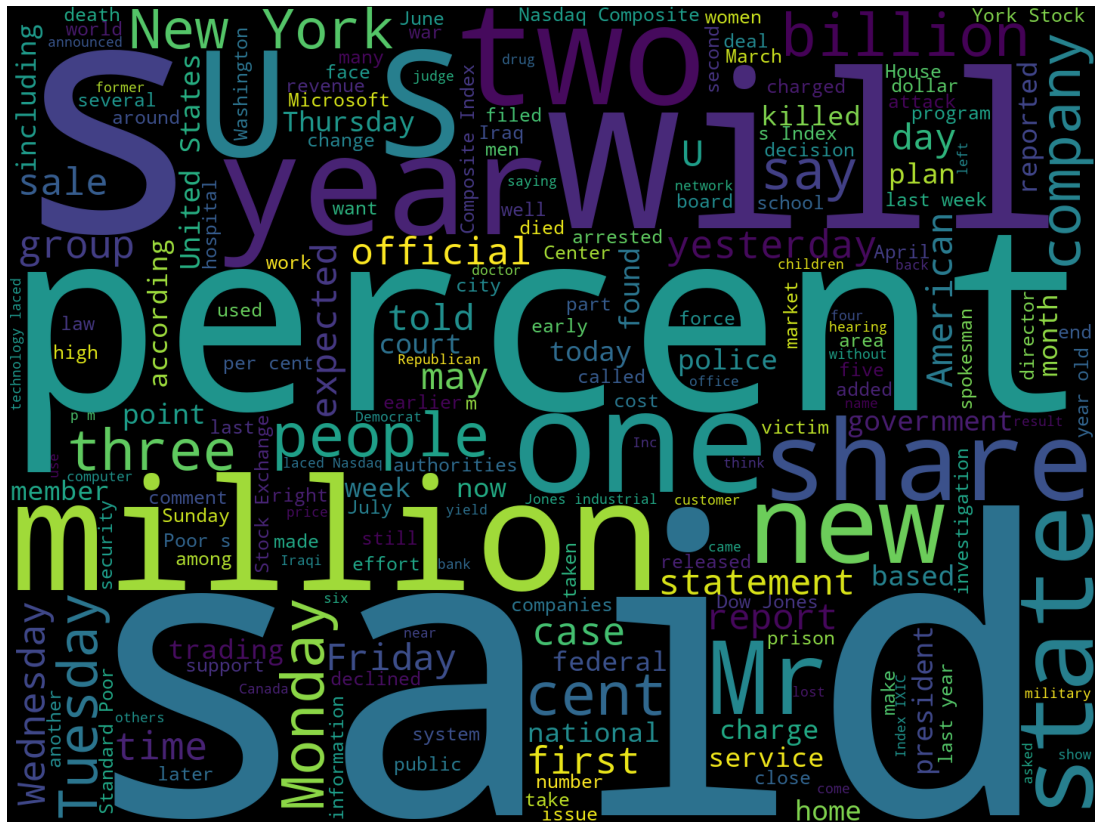

In [11]:
from wordcloud import WordCloud
cloud = WordCloud(width=1440, height=1080).generate(" ".join(train_qs.astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')